In [32]:
import pandas as pd

In [33]:
data=pd.read_csv("P2- OfficeSupplies Data.csv")
data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderDate   43 non-null     object 
 1   Region      43 non-null     object 
 2   Rep         43 non-null     object 
 3   Item        43 non-null     object 
 4   Units       43 non-null     int64  
 5   Unit Price  43 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.1+ KB


In [35]:
data['Sales']=data['Units']*data['Unit Price']

In [36]:
data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Sales
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90


# 1.Sales analysis

### a.total sales for each category

In [37]:
total_sales_by_category=data.groupby('Item')['Sales'].sum().reset_index()
total_sales_by_category

,Item,Sales
0,Binder,9577.65
1,Desk,1700.00
2,Pen,2045.22
3,Pen Set,4169.87
4,Pencil,2135.14


### b.product category of highest sales

In [38]:
total_sales_by_category.sort_values(by='Sales',ascending=False).head(1)

,Item,Sales
0,Binder,9577.65


### c.top 10 best selling products

In [39]:
total_sales_by_category.sort_values(by='Sales',ascending=False).head(10)

,Item,Sales
0,Binder,9577.65
3,Pen Set,4169.87
4,Pencil,2135.14
2,Pen,2045.22
1,Desk,1700.00


# 2.Customer Analaysis

### a.top 10 customers by sales

In [40]:
customers_by_sale=data.groupby('Rep')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)
customers_by_sale

,Rep,Sales
3,Matthew,3109.44
9,Susan,3102.30
0,Alex,2812.19
7,Richard,2363.04
1,Bill,1749.87
8,Smith,1641.43
4,Morgan,1387.77
2,James,1283.61
10,Thomas,1203.11
5,Nick,536.75


### b.total number of unique customers

In [41]:
data['Rep'].nunique()

11

### c.customer purchase frequency

In [42]:
customer_purchase_frequecy=data['Rep'].value_counts()

In [43]:
customer_purchase_frequecy

Richard    8
Bill       5
Alex       5
Matthew    4
James      4
Rachel     4
Morgan     3
Susan      3
Smith      3
Nick       2
Thomas     2
Name: Rep, dtype: int64

# 3.Time Series analysis

In [44]:
data['Month']=data['OrderDate'].apply(lambda x:x.split('-')[1])
data['Year']=data['OrderDate'].apply(lambda x:x.split('-')[2])

In [45]:
data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Sales,Month,Year
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38,Jul,14
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71,Jul,14
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95,Jul,14
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19,Jul,14
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90,Aug,14


### a.Monthly sales order by month

In [46]:
year_data=data[data['Year']=='15']
time_data=year_data.groupby('Month').agg(total_sales=('Sales','sum')).reset_index()
time_data

,Month,total_sales
0,Apr,1059.03
1,Feb,2044.33
2,Jan,1602.09
3,Jun,1613.50
4,Mar,556.87
5,May,1300.35


In [47]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug']
time_data['Month'] = pd.Categorical(time_data['Month'], categories=month_order, ordered=True)
time_data=time_data.sort_values(by='Month')
time_data

,Month,total_sales
2,Jan,1602.09
1,Feb,2044.33
4,Mar,556.87
0,Apr,1059.03
5,May,1300.35
3,Jun,1613.50


### b.seasonal patterns

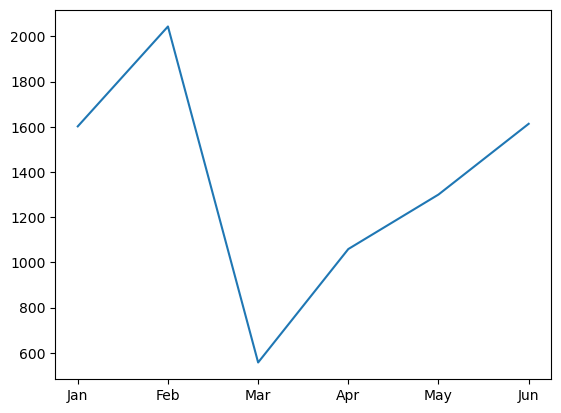

In [48]:
import matplotlib.pyplot as plt
plt.plot(time_data['Month'],time_data['total_sales'])
plt.show()

# 4.Geographical analysis

### a.regions generate more sales

In [49]:
region_data=data['Region']
region_data=data.groupby('Region').agg(total_sales=('Sales','sum')).reset_index()
region_data=region_data.sort_values(by='total_sales',ascending=False)

In [50]:
region_data.head(1)

,Region,total_sales
0,Central,11139.07


### b.sales trends across different regions

In [51]:
region_data.head()

,Region,total_sales
0,Central,11139.07
1,East,6002.09
2,West,2486.72


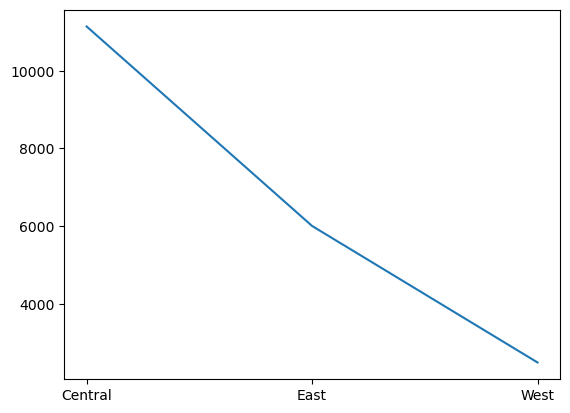

In [52]:
plt.plot(region_data['Region'],region_data['total_sales'])
plt.show()

# 5.Profit analysis

### a.total profit for each category

In [59]:
data['cost']=data['Unit Price']-1

In [60]:
data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Sales,Month,Year,cost
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38,Jul,14,3.99
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71,Jul,14,0.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95,Jul,14,11.49
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19,Jul,14,18.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90,Aug,14,22.95


In [62]:
data['Costprice']=data['cost']*data['Units']

In [63]:
data['Profit']=data['Sales']-data['Costprice']

In [64]:
data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Sales,Month,Year,cost,Costprice,Profit
0,04-Jul-14,East,Richard,Pen Set,62,4.99,309.38,Jul,14,3.99,247.38,62.0
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71,Jul,14,0.99,28.71,29.0
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95,Jul,14,11.49,631.95,55.0
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19,Jul,14,18.99,1538.19,81.0
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90,Aug,14,22.95,963.90,42.0


In [65]:
profit_data=data.groupby('Item').agg(total_profit=('Profit','sum')).reset_index()
profit_data

,Item,total_profit
0,Binder,722.0
1,Desk,10.0
2,Pen,278.0
3,Pen Set,395.0
4,Pencil,716.0


### b.top most profitable items

In [66]:
profit_data.sort_values(by='total_profit',ascending=False)

,Item,total_profit
0,Binder,722.0
4,Pencil,716.0
3,Pen Set,395.0
2,Pen,278.0
1,Desk,10.0
